In [2]:
import numpy as np
from collections import defaultdict
import pandas as pd
import os
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
%store -r notebook2_sets
notebook2_sets

['bougergravity_.csv',
 'isostaticresidual_.csv',
 'totalmagnetic_.csv',
 'variablereduction_.csv',
 'filteredpotassium_.csv',
 'filteredterrestrial_.csv',
 'filteredthorium_.csv',
 'filtereduranium_.csv',
 'alohgroun_.csv',
 'alohgroup_.csv',
 'ferricoxide_.csv',
 'ferrousiron_.csv',
 'ferrousiron_.csv',
 'kaolingroup_.csv',
 'mgohgroup_.csv',
 'opaqueindex_.csv',
 'thermalinfrared_.csv',
 'thermalinfrared_.csv',
 'tirquartz_.csv']

In [6]:
sets = notebook2_sets
sets

['bougergravity_.csv',
 'isostaticresidual_.csv',
 'totalmagnetic_.csv',
 'variablereduction_.csv',
 'filteredpotassium_.csv',
 'filteredterrestrial_.csv',
 'filteredthorium_.csv',
 'filtereduranium_.csv',
 'alohgroun_.csv',
 'alohgroup_.csv',
 'ferricoxide_.csv',
 'ferrousiron_.csv',
 'ferrousiron_.csv',
 'kaolingroup_.csv',
 'mgohgroup_.csv',
 'opaqueindex_.csv',
 'thermalinfrared_.csv',
 'thermalinfrared_.csv',
 'tirquartz_.csv']

In [8]:
# creating a dataset for training from gravity mean features

df_template = pd.read_csv('bougergravity_.csv')
df_template = df_template.set_index('id')
df_template = df_template.loc[:,['label']]

for i, chart in enumerate(sets):
    name = chart.split('.')[0]
    df = pd.read_csv(chart)
    mean_plus = df['_mean'].mean() + 3*df['_mean'].std()
    mean_minus = df['_mean'].mean() - 3*df['_mean'].std()
    if df._mean.mean() == np.Inf:
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')
    else:
        df = df[(df['_mean']>mean_minus)&(df['_mean']<mean_plus)]
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')

In [9]:
df_template

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,alohgroup_mean,ferricoxide_mean,ferrousiron_mean_,ferrousiron_mean,kaolingroup_mean,mgohgroup_mean,opaqueindex_mean,thermalinfrared_mean_,thermalinfrared_mean,tirquartz_mean
id,,,,,,,,,,,,,,,,,,,,
8888,none,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,0.634345,1.476522,0.801257,0.801257,0.039334,0.041605,0.057801,1.071711,1.071711,0.504565
14292,Au,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,0.910935,1.736646,0.809542,0.809542,0.409904,0.458905,0.024803,1.048944,1.048944,0.504052
132399,none,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,0.998933,1.532848,0.893400,0.893400,0.669690,0.705761,0.006561,1.138414,1.138414,0.507330
162412,none,87.514992,148.861694,5.350551,-18.831097,0.190427,19.696089,3.524472,0.311317,NaN,0.007081,NaN,0.018079,0.018079,0.001500,0.001330,0.641325,0.776460,0.776460,0.381714
183374,Au,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,0.817584,1.433846,0.753313,0.753313,0.667851,0.693793,0.402513,1.079018,1.079018,0.501958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99745148,Cu,412.528198,540.145691,NaN,799.942749,1.424576,52.081753,10.567179,1.250504,1.918124,0.123973,1.397835,0.276402,0.276402,0.066165,0.066005,0.050106,1.024366,1.024366,0.502055
99814677,Cu,399.845154,521.334961,NaN,844.665344,1.439703,53.668732,11.027728,1.292889,1.905162,0.073885,1.356365,0.224489,0.224489,0.040412,0.040141,0.060893,1.019394,1.019394,0.501908
99816822,none,-50.670376,34.445644,278.556122,536.822083,0.908758,36.140587,6.798892,1.286240,NaN,0.119957,NaN,0.091187,0.091187,0.114989,0.115645,0.000499,1.016268,1.016268,0.502380


In [10]:
df_template.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 8888 to 99902945
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     1863 non-null   object 
 1   bougergravity_mean        1862 non-null   float64
 2   isostaticresidual_mean    1862 non-null   float64
 3   totalmagnetic_mean        1828 non-null   float64
 4   variablereduction_mean    1862 non-null   float64
 5   filteredpotassium_mean    1863 non-null   float64
 6   filteredterrestrial_mean  1863 non-null   float64
 7   filteredthorium_mean      1863 non-null   float64
 8   filtereduranium_mean      1863 non-null   float64
 9   alohgroun_mean            1787 non-null   float64
 10  alohgroup_mean            1863 non-null   float64
 11  ferricoxide_mean          1812 non-null   float64
 12  ferrousiron_mean_         1863 non-null   float64
 13  ferrousiron_mean          1863 non-null   float64
 14  k

In [15]:
stamps= gpd.read_file('data/stamp_locations.geo.json')

In [16]:
stamp_feature = stamps.loc[:,['id','age']]
stamp_feature = stamp_feature.set_index('id')
stamp_feature.index = stamp_feature.index.astype(int)
stamp_feature.loc[:,'age'] = stamp_feature['age'].str.replace('Archean','Archaean')

In [19]:
df_template = df_template.join(stamp_feature)

In [20]:
df_template = df_template.join(pd.get_dummies(df_template['age']))

In [22]:
dataset = df_template.copy()
dataset.drop(columns=['age'], inplace=True)

In [23]:
factor = pd.factorize(dataset['label'])
dataset.loc[:,'label'] = factor[0]
definitions = factor[1]

In [24]:
print(dataset['label'].head())
print(definitions)

id
8888      0
14292     1
132399    0
162412    0
183374    1
Name: label, dtype: int64
Index(['none', 'Au', 'Cu', 'PGE', 'other', 'Fe', 'Pb'], dtype='object')


In [25]:
dataset = dataset[dataset['filtereduranium_mean']!=np.inf]

In [26]:
dataset = dataset.dropna()

In [27]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

X.shape

(1689, 59)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [39]:
y_pred_train = clf.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [45]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.9826224328593997
TEST: 0.5697399527186762

Balanced Accuracy:
TRAIN: 0.9619681682839578
TEST: 0.30800060887681013


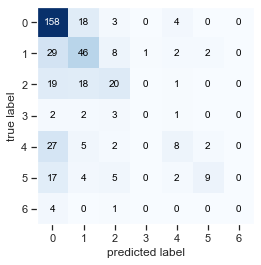

In [46]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
plt.show()